# To-Do - List
1. Implementar a classe para fazer o one-hot encoding dos bairros

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from src.model.data import __version__

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.pipeline import make_pipeline

from src.base import logger
from src.config import get_config
from src.model.data import get_train_dataset, add_external_data
from src.model.features import build_features, neighbors_one_hot_encode
from src.model.preprocessing import PreProcessor
from src.model.preprocessing import EncoderIV

from sklearn.ensemble import RandomForestClassifier, GradientBoostingRegressor

#from xgboost import XGBClassifier


pd.options.display.max_columns = None

%config IPCompleter.use_jedi=False

In [8]:
# Getting data information
data_config = get_config(filename="config/data_path.yaml")
features_config = get_config(filename="config/features.yaml")

# Construct the dataset
raw_scrapped_features, y = get_train_dataset(data_config, extract_data=False)
raw_scrapped_features = add_external_data(raw_scrapped_features, data_config)

X = build_features(raw_scrapped_features)

# Splitting in train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=42)

# Train preprocessor
preprocessor = PreProcessor(features_config)
preprocessor.fit(X_train, y_train)

# Tranforming features
X_train = preprocessor.transform(X_train)
X_train = neighbors_one_hot_encode(X_train)

X_test = preprocessor.transform(X_test)
X_test = neighbors_one_hot_encode(X_test)

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import HistGradientBoostingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

neighbors = X_train

neighbors_1,neighbors_2, y_1, y_2 = train_test_split(neighbors,y_train, test_size=0.25,random_state=42)

model = XGBRegressor(max_depth=15, min_child_weight=1)

model.fit(neighbors_1, y_1)

print('r2 = ',r2_score(model.predict(neighbors_2),y_2))
print('me = ',mean_absolute_error(model.predict(neighbors_2),y_2))

r2 =  0.959697693123902
me =  41326.37506176703


In [10]:
temp = pd.DataFrame({'feature':neighbors.columns,'importance':model.feature_importances_}).sort_values('importance',ascending=False)

temp['cumsum'] = temp['importance'].cumsum()

var = temp.values

var[:26,0]

temp


,feature,importance,cumsum
158,neighbor_cristiano_ozorio,0.135952,0.135952
24,pct_domicilios_por_sal_min_1_2,0.128883,0.264835
26,pct_domicilios_por_sal_min_5_10,0.083926,0.348760
27,pct_domicilios_por_sal_min_10_20,0.057755,0.406516
3,area,0.056384,0.462899
...,...,...,...
155,neighbor_residencial_campo_da_cachoeira,0.000000,1.000000
17,dist,0.000000,1.000000
10,type_COUNTRY,0.000000,1.000000
105,neighbor_panorama,0.000000,1.000000


# Fake Teste

In [44]:
from src.model.data import sanitize_features
fake_data = {
    'type': 'APARTMENT',
    'n_parking_spaces': 2,
    'n_bathrooms': 3,
    'n_bedrooms': 3,
    'area': 155,
    'n_floors': np.nan,
    'units_on_floor': 0,
    'n_suites': 1,
    'state': 'MG',
    'city': 'Poços de Caldas',
    'neighborhood': 'Centro',
    'street': None,
    'longitude': np.nan,
    'latitude': np.nan,
    'condo_fee': 800.0,
    #'iptu': 625.0,
    'resale': 0,
    'buildings': 0,
    'plan_only': 0,
    'search_date': '2022-06-01'
}

fake_features = pd.DataFrame([fake_data])
fake_features = sanitize_features(fake_features)
fake_features = add_external_data(fake_features, data_config)

x = build_features(fake_features)
x = preprocessor.transform(x)
x = neighbors_one_hot_encode(x)

model.predict(x)

array([808740.], dtype=float32)

In [14]:
model.predict(x)

array([200180.2], dtype=float32)

,id,search_id,id_zap,type,n_parking_spaces,n_bathrooms,n_bedrooms,area,n_floors,units_on_floor,n_suites,state,city,neighborhood,street,longitude,latitude,condo_fee,iptu,resale,buildings,plan_only,price,search_date
0,1,2503300374__2021_06_04_00_23_37,2503300374,HOME,2.0,3.0,3.0,100.0,NaN,0,1.0,MG,Poços de Caldas,Jardim Das Hortênsias,None,NaN,NaN,NaN,NaN,0,0,0,420000.0,2021-06-04


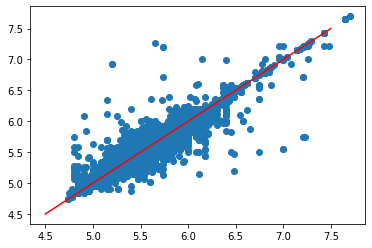

In [ ]:
plt.plot(np.linspace(4.5,7.5,100),np.linspace(4.5,7.5,100), color='red')
plt.scatter(y_train, model.predict(neighbors))
plt.show()

In [ ]:
temp = X.iloc[3]

temp.to_dict()

{'id': 4,
 'search_id': '2500808474__2021_06_04_00_23_40',
 'id_zap': '2500808474',
 'type': 'HOME',
 'n_parking_spaces': 2.0,
 'n_bathrooms': 3.0,
 'n_bedrooms': 2.0,
 'area': 130.0,
 'n_floors': nan,
 'units_on_floor': 0,
 'n_suites': 2.0,
 'state': 'MG',
 'city': 'Poços de Caldas',
 'neighborhood': 'jardim_amaryllis',
 'street': None,
 'longitude': nan,
 'latitude': nan,
 'condo_fee': 0.0,
 'iptu': 0.0,
 'resale': 0,
 'buildings': 0,
 'plan_only': 0,
 'search_date': '2021-06-04',
 'type_APARTMENT': 0.0,
 'type_HOME': 1.0,
 'type_ALLOTMENT_LAND': 0.0,
 'type_COUNTRY': 0.0,
 'dist_manh': nan,
 'dist_square': nan,
 'dist': nan,
 'time_delta': 154,
 'year': 2021,
 'month': 6,
 'day': 4}

In [ ]:
temp = dfiv[dfiv['feature']=='jardim_bandeirantes'].sort_values('v_min')['woe']

plt.plot([i for i in range(len(temp))], temp)

plt.show()

NameError: name 'dfiv' is not defined

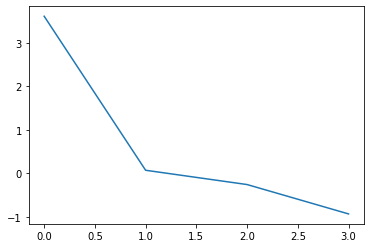

In [ ]:
temp = dfiv[dfiv['feature']=='jardim_dos_estados'].sort_values('v_min')['woe']

plt.plot([i for i in range(len(temp))], temp)

plt.show()

In [ ]:
data_temp

,feature,total,0,%0,1,%1,woe,iv,p_min,p_max,v_min,v_max
76,jardim_quisisana,1869,1836,0.059516,33,0.009502,1.834751,0.091763,0.0,0.1,4.740363,5.290035
73,jardim_quisisana,1869,1767,0.057950,102,0.026632,0.777466,0.024349,0.1,0.2,5.290035,5.380211
57,jardim_quisisana,1869,1674,0.054927,195,0.050715,0.079773,0.000336,0.2,0.3,5.380211,5.447158
33,jardim_quisisana,1869,1561,0.051522,308,0.076541,-0.395823,0.009903,0.3,0.4,5.447158,5.518514
36,jardim_quisisana,1869,1584,0.051829,285,0.075798,-0.380119,0.009111,0.4,0.5,5.518514,5.579784
14,jardim_quisisana,1869,1255,0.042557,614,0.127070,-1.093895,0.092448,0.5,0.6,5.579784,5.653213
23,jardim_quisisana,1869,1495,0.048802,374,0.101410,-0.731401,0.038478,0.6,0.7,5.653213,5.740363
53,jardim_quisisana,1869,1745,0.057398,124,0.031633,0.595812,0.015351,0.7,0.8,5.740363,5.845098
46,jardim_quisisana,1869,1724,0.056403,145,0.038605,0.379135,0.006748,0.8,0.9,5.845098,6.000000
55,jardim_quisisana,1869,1838,0.059743,31,0.008715,1.924986,0.098228,0.9,1.0,6.000000,7.698970


In [ ]:
dfiv[dfiv['feature']=='jardim_quisisana']

,feature,total,0,%0,1,%1,woe,iv,v_min,v_max
14,jardim_quisisana,1869,1255,0.042557,614,0.127070,-1.093895,0.092448,5.579784,5.653213
36,jardim_quisisana,1869,1584,0.051829,285,0.075798,-0.380119,0.009111,5.518514,5.579784
23,jardim_quisisana,1869,1495,0.048802,374,0.101410,-0.731401,0.038478,5.653213,5.740363
55,jardim_quisisana,1869,1838,0.059743,31,0.008715,1.924986,0.098228,6.000000,7.698970
53,jardim_quisisana,1869,1745,0.057398,124,0.031633,0.595812,0.015351,5.740363,5.845098
46,jardim_quisisana,1869,1724,0.056403,145,0.038605,0.379135,0.006748,5.845098,6.000000
73,jardim_quisisana,1869,1767,0.057950,102,0.026632,0.777466,0.024349,5.290035,5.380211
33,jardim_quisisana,1869,1561,0.051522,308,0.076541,-0.395823,0.009903,5.447158,5.518514
57,jardim_quisisana,1869,1674,0.054927,195,0.050715,0.079773,0.000336,5.380211,5.447158
76,jardim_quisisana,1869,1836,0.059516,33,0.009502,1.834751,0.091763,4.740363,5.290035


In [ ]:
temp = (X_train[['neighborhood']] == 'jardim_quisisana').fillna(False).astype(int)

# Splitting in train and test
temp_train, temp_test, f_train, f_test = train_test_split(temp,y_train,test_size=0.25, random_state=42)


model = RandomForestRegressor().fit(temp_train, f_train)

model.score(temp_test,f_test)

0.00040642013102243357

0.00040730876407690797

In [ ]:
f_test.values.shape

(8606,)

In [ ]:
model.score(f_test.values, a)

ValueError: Expected 2D array, got 1D array instead:
array=[5.5910645 5.623249  5.6532125 ... 5.792392  5.770852  5.9867716].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
f_test

29232    5.591065
44685    5.623249
37877    5.653213
13006    6.023664
25179    5.255273
           ...   
40684    5.462398
11901    5.462398
19427    5.792392
26378    5.770852
34191    5.986772
Name: log10_price, Length: 8606, dtype: float64

In [ ]:
dfiv = eval_iv_continuous(X_train['neighborhood'], y_train, step = 0.1)

dfiv.groupby('feature').agg(
    iv = ('iv', 'sum'),
    
)['iv'].sort_values()

feature
bortolan_sul                 0.000137
loteamento_nova_primavera    0.000944
boa_esperanca                0.001206
vila_jose_carlos             0.001634
augusto_de_almeida           0.001660
                               ...   
jardim_quisisana             0.386714
centro                       0.430930
jardim_europa                0.477335
jardim_dos_estados           0.510338
jardim_bandeirantes          0.553568
Name: iv, Length: 134, dtype: float64

In [ ]:
step = 0.25

list_ = []
for p in np.arange(0,1,step):
    p_start = p
    p_end = p + step
    temp = eval_information_value(
        X_train['neighborhood'],
        (y_train.between(*y_train.quantile([p_start,p_end]))).astype(int), 
        goods=0
    )
    temp = temp[~np.isinf(temp['iv'])]
    list_.append(
        temp.sort_values('woe')
        .reset_index()
        .assign(p_min = p_start)
        .assign(p_max = p_end)
    )

df = pd.concat(list_).sort_values('feature')

step * df['iv'].sum()

In [ ]:
step = 0.25

def eval_iv_continuous(data,)

list_ = []
for p in np.arange(0,1,step):
    p_start = p
    p_end = p + step
    temp = eval_information_value(
        X_train['neighborhood'],
        (y_train.between(*y_train.quantile([p_start,p_end]))).astype(int), 
        goods=0
    )
    temp = temp[~np.isinf(temp['iv'])]
    list_.append(
        temp.sort_values('woe')
        .reset_index()
        .assign(p_min = p_start)
        .assign(p_max = p_end)
    )

df = pd.concat(list_).sort_values('feature')

step * df['iv'].sum()

0.9461279580490578

In [ ]:
#.groupby(['p_min', 'p_max'])['iv'].sum()

In [ ]:
df[df['p_min']==0]

,feature,total,0,%0,1,%1,woe,iv,p_min,p_max
28,bem_bastos,34,26,0.000843,8,0.002303,-1.005431,0.001469,0.0,0.1
70,bianucci,67,65,0.002107,2,0.000576,1.297155,0.001986,0.0,0.1
32,boa_esperanca,5,4,0.000130,1,0.000288,-0.797791,0.000126,0.0,0.1
9,boa_esperanca_ii,34,20,0.000648,14,0.004031,-1.827411,0.006182,0.0,0.1
82,bortolan,409,406,0.013161,3,0.000864,2.723655,0.033493,0.0,0.1
...,...,...,...,...,...,...,...,...,...,...
31,vila_nossa_senhora_de_fatima,30,24,0.000778,6,0.001728,-0.797791,0.000758,0.0,0.1
68,vila_nova,100,97,0.003144,3,0.000864,1.292013,0.002946,0.0,0.1
1,vila_rica,46,11,0.000357,35,0.010078,-3.341538,0.032484,0.0,0.1
61,vila_togni,431,409,0.013258,22,0.006335,0.738587,0.005114,0.0,0.1


9.30002971592509

In [ ]:
df['iv'].sum()

0.931978555195227

In [ ]:
X_train['neighborhood']

705              parque_primavera
32267                  zona_rural
27494                    bianucci
5707     chacaras_pocos_de_caldas
24481                      centro
                   ...           
11413            jardim_quisisana
45192         residencial_morumbi
38551            jardim_quisisana
872            jardim_elvira_dias
15963          jardim_dos_estados
Name: neighborhood, Length: 34424, dtype: object

In [ ]:
import seaborn as sns

temp = X_train[['neighborhood']].assign(price=10**y)

temp = temp.groupby('neighborhood').agg(
    price = ('price', 'mean'),
    count = ('price', 'count'),
).round(0).sort_values('price').reset_index()



In [ ]:
X_train['latitude']

705      missing_value
32267    missing_value
27494        -21.82945
5707     missing_value
24481        -21.78838
             ...      
11413       -21.803255
45192        -21.80749
38551       -21.797683
872      missing_value
15963    missing_value
Name: latitude, Length: 34424, dtype: object

TypeError: 'value' must be an instance of str or bytes, not a float

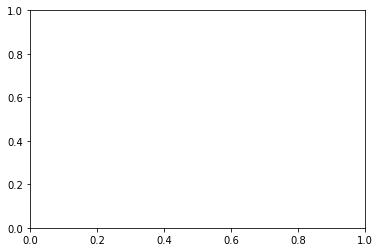

In [ ]:
temp = X_train.loc[X_train['neighborhood'].fillna('').str.contains('rura'),["latitude","longitude"]]

sns.scatterplot(data=X_train, x='longitude', y='latitude')
sns.scatterplot(data=temp, x='longitude', y='latitude', color = 'red')

plt.show()

In [ ]:
temp[temp['neighborhood'].str.contains('chacara')]

,neighborhood,price,count
0,chacara_santa_barbara,120000.0,4
1,chacara_rancho_azul,130000.0,1
2,chacara_dos_pessegueiros,140000.0,14
16,chacara_alvorada,243256.0,125
75,chacara_sao_pedro,420000.0,1
108,chacaras_pocos_de_caldas,557345.0,145
130,chacara_praia_do_sol,915310.0,71
131,chacara_dos_cravos,922000.0,14
151,chacara_sao_francisco,2452963.0,27
153,chacaras_alto_da_boa_vista,2847500.0,16


In [ ]:
from difflib import SequenceMatcher

def similar(a, b):
    return SequenceMatcher(None, a, b).ratio()

In [ ]:
from tqdm import tqdm
list_ = []
for n1 in tqdm(range(len(temp.index))):
    for n2 in range(n1+1,len(temp.index)):
        b1 = temp.index[n1]
        b2 = temp.index[n2]
        c1 = temp['count'][b1]
        c2 = temp['count'][b2]
        r = min(c1/c2, c2/c1)
        list_.append({'b1': b1, 'b2': b2, 'index': similar(b1, b2), 'ratio': r, 'sum': c1+c2})

100%|██████████| 165/165 [00:01<00:00, 126.32it/s]


In [ ]:
sim = pd.DataFrame(list_)

In [ ]:
sim.sort_values(by=['index','sum','ratio'],ascending=[False,False,True]).to_excel("../bairros_similaridade.xlsx")

In [ ]:
sim[sim['index'] < 1].sort_values('index', ascending=False).to_excel("../bairros_similaridade.xlsx")

In [ ]:
temp.to_excel("../bairros.xlsx")

In [ ]:
NEIGHBORHOOD_MAPS = {
    'Bortolan Norte I': 'Bortolan Norte',
    'Loteamento Jardim Nova Europa': 'Jardim Europa',
    'Jardim das Hortências': 'Jardim Das Hortênsias'
}

In [ ]:
X[X['neighborhood'].str.contains('Bortolan').fillna(False)]['neighborhood'].unique()

array(['Bortolan', 'Bortolan Norte I', 'Bortolan Sul'], dtype=object)

In [ ]:
X_train[X_train['neighborhood'] == 'Bortolan Norte I']

,n_parking_spaces,n_bathrooms,n_bedrooms,area,n_suites,latitude,longitude,type_APARTMENT,type_HOME,type_ALLOTMENT_LAND,type_COUNTRY,neighborhood
15291,0.000000,0.0,0.000000,2.853798,0.0,-21.786006,-46.631535,0.0,0.0,1.0,0.0,Bortolan Norte I
13806,0.000000,0.0,0.000000,1.946360,0.0,NaN,NaN,0.0,0.0,1.0,0.0,Bortolan Norte I
17673,0.237015,1.0,0.519236,2.381134,2.0,-21.782818,-46.629542,0.0,1.0,0.0,0.0,Bortolan Norte I
16526,0.000000,0.0,0.000000,2.853798,0.0,NaN,NaN,0.0,0.0,1.0,0.0,Bortolan Norte I
43307,0.000000,0.0,0.000000,2.853798,0.0,-21.786006,-46.631535,0.0,0.0,1.0,0.0,Bortolan Norte I
...,...,...,...,...,...,...,...,...,...,...,...,...
8195,0.000000,0.0,0.000000,2.853798,0.0,NaN,NaN,0.0,0.0,1.0,0.0,Bortolan Norte I
13208,0.000000,0.0,0.000000,2.853798,0.0,-21.786007,-46.631535,0.0,0.0,1.0,0.0,Bortolan Norte I
26804,0.000000,0.0,0.000000,2.853798,0.0,-21.782818,-46.629542,0.0,0.0,1.0,0.0,Bortolan Norte I
27766,0.000000,0.0,0.000000,2.853798,0.0,-21.786006,-46.631535,0.0,0.0,1.0,0.0,Bortolan Norte I
